# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [23]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []

#create an empty list to collect rating stars
stars = []
#create an empty list to collect date
date = []
#create an empty list to collect country the reviewer is from
country = []


df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        #df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        df = pd.concat([df, data_dict], ignore_index=True).reset_index(drop=True)
        rating = []
        category = []
    
    skip_first = True  # Flag to skip the first element
    for para in parsed_content.findAll("div", class_="rating-10"):
        if skip_first:
            skip_first = False  # Reset the flag so that subsequent elements are not skipped
            continue  # Skip the rest of the code in this iteration, moving on to the next iteration  
        stars.append(para.span.text)

    for para in parsed_content.find_all("time"):
        date.append(para.text)
    
    for para in parsed_content.find_all("h3"):
        country.append(para.span.next_sibling.lower())

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [24]:
data_stars = pd.DataFrame([stars]).transpose()
data_date = pd.DataFrame([date]).transpose()
data_country = pd.DataFrame([country]).transpose()

In [37]:
data_stars.reset_index(drop=True,inplace=True)
data_stars.columns = ['stars']
data_date.reset_index(drop=True,inplace=True)
data_date.columns = ['date']
data_country.reset_index(drop=True,inplace=True)
data_country.columns = ['country']

In [54]:
df = pd.concat([df, data_stars,data_date,data_country], axis=1).reset_index(drop=True)
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,stars,date,country
650,Family Leisure,Premium Economy,Austin to London,October 2019,NaN,NaN,NaN,NaN,NaN,NaN,1,no,NaN,✅ Trip Verified | Austin to London. Along wit...,1,16th December 2019,(united states)
563,Couple Leisure,Business Class,London Heathrow to Toronto,February 2020,5.0,5.0,5.0,5.0,5.0,NaN,5,yes,A350,✅ Trip Verified | London Heathrow to Toronto....,10,28th April 2020,(united kingdom)
720,Solo Leisure,Economy Class,Istanbul to New York via London,October 2019,3.0,3.0,3.0,3.0,1.0,NaN,1,no,NaN,✅ Trip Verified | Istanbul to New York via Lon...,1,9th October 2019,(united states)
740,Couple Leisure,Business Class,London to Milan,September 2019,1.0,1.0,NaN,NaN,1.0,NaN,1,no,NaN,✅ Trip Verified | I wouldn't even rate them 1...,1,19th September 2019,(united kingdom)
351,Couple Leisure,Business Class,London to Thira,June 2022,5.0,5.0,5.0,NaN,5.0,NaN,5,yes,A320,✅ Trip Verified | The crew BA656 on 6 June ab...,10,8th June 2022,(united kingdom)


In [55]:
df.to_csv("BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

In [95]:
data = pd.read_csv('BA_reviews.csv')
data.shape

(1000, 17)

## Cleaning Reviews

In [96]:
data['verified'] = data.reviews.str.contains('Trip Verified')

In [97]:
data['verified']

0       True
1      False
2       True
3       True
4       True
       ...  
995     True
996    False
997     True
998     True
999     True
Name: verified, Length: 1000, dtype: bool

In [98]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

lemma = WordNetLemmatizer()

review_data = data.reviews.str.strip("✅ Trip Verified |")

corpus = []

for rev in review_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package wordnet to /Users/mikkel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mikkel/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [99]:
data['corpus'] = corpus


## Cleaning/Fromat date

In [100]:
data.dtypes

Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Inflight Entertainment    float64
Ground Service            float64
Wifi & Connectivity       float64
Value For Money             int64
Recommended                object
Aircraft                   object
reviews                    object
stars                       int64
date                       object
country                    object
verified                     bool
corpus                     object
dtype: object

In [101]:
data['date'] = data['date'].str.replace("Augu", "Aug")
data['date'] = data['date'].str.replace(r'(st|nd|rd|th)', '')
data.date = pd.to_datetime(data.date)

/var/folders/zg/1pb8nfp5473d_0jl7b7d8jyw0000gn/T/ipykernel_1686/3709060618.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date'] = data['date'].str.replace(r'(st|nd|rd|th)', '')


In [103]:
data.date.head()

0   2023-10-19
1   2023-10-19
2   2023-10-17
3   2023-10-17
4   2023-10-16
Name: date, dtype: datetime64[ns]

## Check for null Values

In [104]:
data.isnull().value_counts()

Type Of Traveller  Seat Type  Route  Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  Inflight Entertainment  Ground Service  Wifi & Connectivity  Value For Money  Recommended  Aircraft  reviews  stars  date   country  verified  corpus
False              False      False  False       False         False                False             False                   False           True                 False            False        False     False    False  False  False    False     False     188
                                                                                                      True                    False           True                 False            False        False     False    False  False  False    False     False     137
                                                                                                      False                   False           False                False            False        False     False    False  False  Fals

In [105]:
data.country.isnull().value_counts()


False    1000
Name: country, dtype: int64

In [106]:
data.drop(data[data.country.isnull() == True].index, axis=0, inplace=True)


In [108]:
data.reset_index(drop=True)
data

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,stars,date,country,verified,corpus
0,Solo Leisure,Business Class,İstanbul to London,October 2023,2.0,1.0,1.0,1.0,2.0,1.0,1,no,NaN,✅ Trip Verified | I flew from Istanbul to Lo...,1,2023-10-19,(united kingdom),True,flew istanbul london business class half fligh...
1,Couple Leisure,Economy Class,London to Austin,October 2023,1.0,1.0,1.0,5.0,1.0,NaN,1,no,NaN,Not Verified | I have flow on BA several time...,1,2023-10-19,(united states),False,verified flow ba several time since airline st...
2,Solo Leisure,Economy Class,Geneva to London Heathrow,October 2023,1.0,2.0,1.0,NaN,1.0,NaN,2,no,A320,✅ Trip Verified | The flight departed over a...,1,2023-10-17,(united kingdom),True,flight departed hour late due late inbound pla...
3,Couple Leisure,Economy Class,Istanbul via London,October 2023,1.0,3.0,3.0,4.0,1.0,NaN,1,no,NaN,✅ Trip Verified | I hate British Airways! We...,1,2023-10-17,(united states),True,hate british airway get london oct next flight...
4,Couple Leisure,Business Class,Porto to London,September 2023,4.0,5.0,4.0,NaN,1.0,NaN,4,no,A320,✅ Trip Verified | Our BA flight from Porto t...,5,2023-10-16,(united kingdom),True,ba flight porto london heathrow operated finna...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Solo Leisure,Economy Class,Leeds Bradford to London Heathrow,December 2018,3.0,5.0,NaN,NaN,5.0,NaN,4,yes,A319,✅ Trip Verified | I had flown British Airways ...,8,2018-12-30,(thailand),True,flown british airway leeds bradford london hea...
996,Solo Leisure,Economy Class,Gatwick to Tenerife,December 2018,1.0,3.0,4.0,NaN,5.0,NaN,3,no,A320,Not Verified | Gatwick to Tenerife. This airc...,7,2018-12-29,(united kingdom),False,verified gatwick tenerife aircraft either need...
997,Couple Leisure,Premium Economy,Denver to Paris via London,December 2018,NaN,NaN,NaN,NaN,NaN,NaN,1,no,NaN,✅ Trip Verified | Booked a flight through Exp...,1,2018-12-24,(united states),True,booked flight expedia june denver paris via lo...
998,Couple Leisure,Business Class,Johannesburg to London,November 2018,1.0,1.0,1.0,3.0,2.0,NaN,1,no,A380,✅ Trip Verified | Johannesburg to London. I h...,1,2018-12-24,(south africa),True,johannesburg london bulkhead seat upper deck a...


In [118]:
data['country'] = data['country'].str.replace('(', '').str.replace(')', '')


/var/folders/zg/1pb8nfp5473d_0jl7b7d8jyw0000gn/T/ipykernel_1686/1921198025.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['country'] = data['country'].str.replace('(', '').str.replace(')', '')


In [120]:
data.to_csv("cleaned-BA-reviews.csv")

# EDA

## reviews wordcloud

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

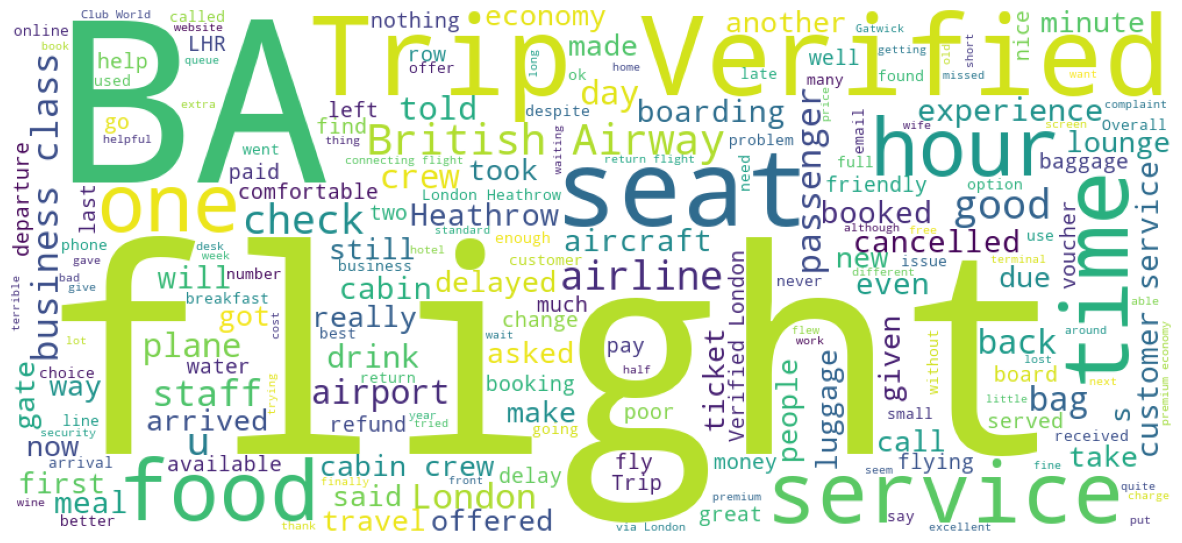

In [122]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Recommended yes/no

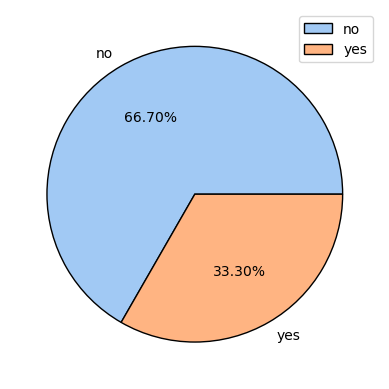

In [123]:
soc = data.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

## what is the average overall rating given for British Airways?

In [124]:
# 0-10
data.stars.mean()

4.12

In [138]:
ddd = data.country.unique()

In [141]:
len(ddd)

54

In [125]:
data.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,stars
count,913.000000,907.000000,792.000000,536.000000,943.000000,291.000000,1000.000000,1000.000000
mean,2.757941,3.188534,2.674242,2.802239,2.617179,2.223368,2.403000,4.120000
std,1.387406,1.519832,1.473729,1.471878,1.545764,1.531825,1.484181,3.310069
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,7.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


## what is the total counts for each ratings?

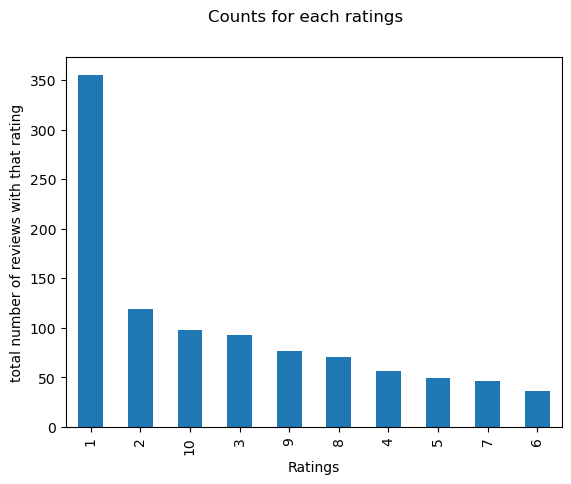

In [126]:
data.stars.value_counts().plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("total number of reviews with that rating")
plt.suptitle('Counts for each ratings')
plt.show()

## Which country most review comes from?

In [127]:
df_country_review = pd.DataFrame(data.country.value_counts().head()).reset_index()

In [129]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review

,country,total_reviews
0,united kingdom,575
1,united states,165
2,australia,34
3,canada,31
4,south africa,20


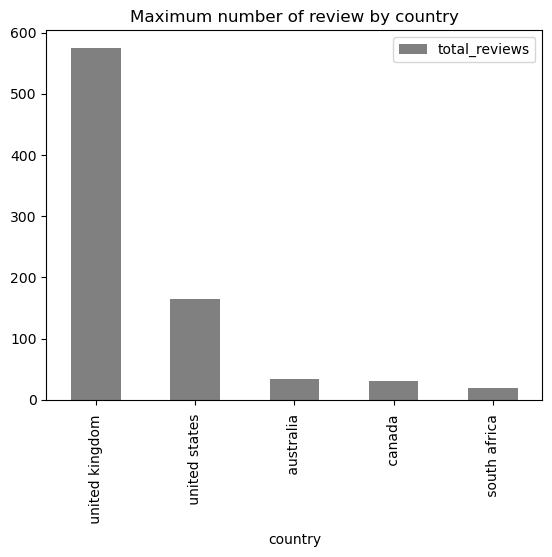

In [130]:
df_country_review.plot(kind="bar", x='country', color = 'gray')
plt.title("Maximum number of review by country")
plt.show()

## Word Frequency

In [134]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

<Figure size 2000x1000 with 0 Axes>

In [135]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

<Figure size 2000x1000 with 0 Axes>

In [136]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'food'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'class'),
  Text(7, 0, 'staff'),
  Text(8, 0, 'good'),
  Text(9, 0, 'business'),
  Text(10, 0, 'cabin'),
  Text(11, 0, 'check'),
  Text(12, 0, 'customer'),
  Text(13, 0, 'day'),
  Text(14, 0, 'economy'),
  Text(15, 0, 'airport'),
  Text(16, 0, 'bag'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'told'),
  Text(19, 0, 'experience')])

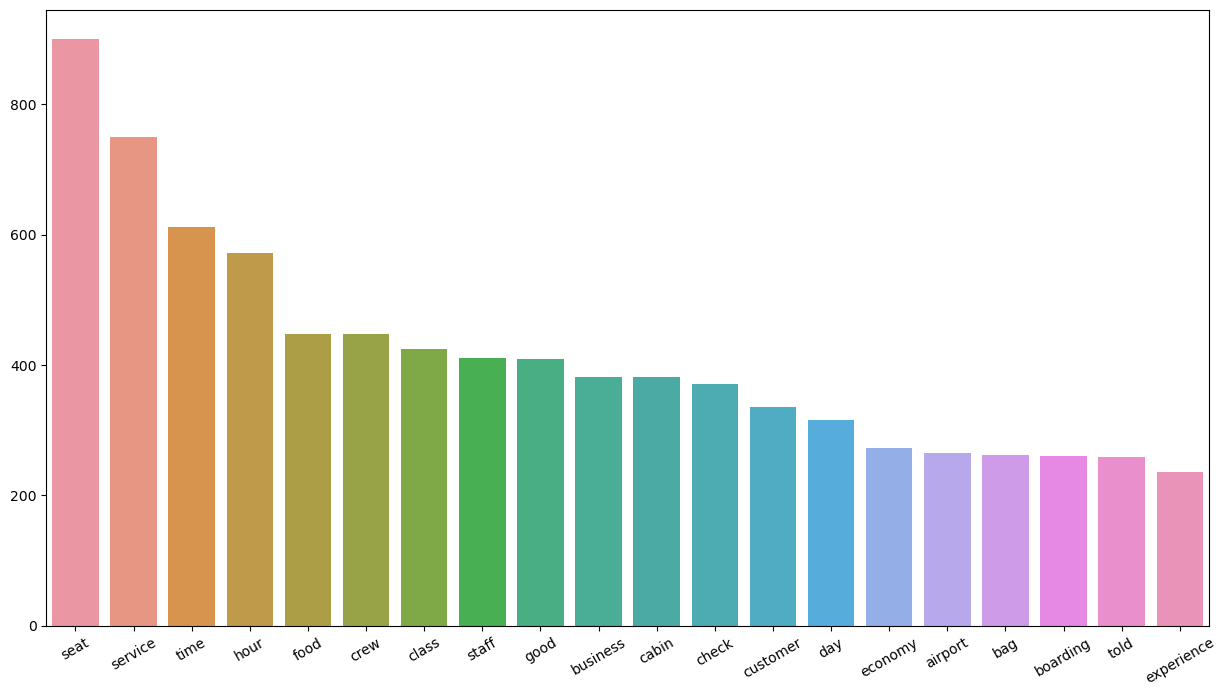

In [137]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
#all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)